# Week 12 Hypothesis Testing



This week we cover three methods of hypothesis testing given what types of variables we have:

<table>
    <thead>
        <tr>
            <td colspan=4>Independent variable type</td>
        </tr>
    </thead>
    <tbody>
         <tr>
            <td rowspan=4>Dependent variable type</td>
        </tr>
        <tr>
            <th></th>
            <th>Categorical</th>
            <th>Continuous</th>
        </tr>
        <tr>
            <th>Categorical</th>
            <td>Tabular analysis</td>
            <td>Probit/logit</td>
        </tr>
        <tr>
            <th>Continuous</th>
            <td>Difference of means</td>
            <td>Correlation coefficient</td>
        </tr>
    </tbody>
</table>

In [5]:
import numpy as np
from scipy import stats
from datascience import Table
import pandas as pd
from ipywidgets import *
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Tabular Analysis: when IV and DV are categorical

### Exercise 1

Do Black women vote differently than white women?

Null hypothesis: Black and white women vote for Republican and Democratic candidates at similar rates. 

Alternative hypothesis: Black women vote for Democratic candidates at higher rates than white women.

From CNN's exit poll, we know that 42% of women in the sample voted for Moore and 58% of women voted for Jones, regardless of race, in the special election for U.S. Senate in Alabama in 2017. (The poll actually shows 41% and 57% respectively with 2% giving no response, but for the purpose of the exercise, we'll use 42 and 58.)

In [3]:
Table().with_columns(
                'Candidate',['Moore', 'Jones', 'Column Total'],
                'Black Women', ['?', '?', '100%'],
                'White Women', ['?', '?', '100%'],
                'Row Total', ['42%', '58%', '100%']
                )

Candidate,Black women,White women,Row Total
Moore,?,?,42%
Jones,?,?,58%
Column Total,100%,100%,100%


If the null hypothesis were true, then we would expect the rates to be the same. (Note in the following table that  the percentages don’t equal the row total.  This is simply to convey the hypothetical breakdown given the null.)

In [4]:
Table().with_columns(
                'Candidate',['Moore', 'Jones', 'Column Total'],
                'Black Women', ['42%', '58%', '100%'],
                'White Women', ['42%', '58%', '100%'],
                'Row Total', ['42%', '58%', '100%']
                )

Candidate,Black women,White women,Row Total
Moore,42%,42%,42%
Jones,58%,58%,58%
Column Total,100%,100%,100%


If there are 406 Black women in the sample and 718 white women in the sample, and 474 respondents who voted for Moore and 650 who voted for Jones, what are the column and row totals?

Next, how do we calculate the expected cell values if intersection of race and gender is unrelated to candidate preference? Fill in the table below with the correct values.

Some hints: (1) Remove the '' to make the value in the cell numeric. Apostrophes around characters tell Python to read as string. (2) In cells in the table where you use multiplication, Python will do the calculation for you; i.e. if you type 3$*$4 then the output will be 12. (3) Convert percentages to decimals.

In [8]:
expected = Table().with_columns(
                'Candidate',['Moore', 'Jones', 'Column Total'],
                'Black Women', ['?*?', '?*?', '?'],
                'White Women', ['?*?', '?*?', '?'],
                'Row Total', ['?', '?', '?']
                )
expected

Candidate,Black women,White women,Row Total
Moore,?*?,?*?,?
Jones,?*?,?*?,?
Column Total,?,?,?


The actual observed values were among Black women, 8 voted for Moore and 398 voted for Jones, and among white women, 466 voted for Moore and 252 voted for Jones. Create an observed values table. 

In [15]:
observed = Table().with_columns(
                'Candidate',['Moore', 'Jones', 'Column Total'],
                'Black Women', ['?', '?', '?'],
                'White Women', ['?', '?', '?'],
                'Row Total', ['?', '?', '?']
                )
observed

Candidate,Black Women,White Women,Row Total
Moore,?,?,?
Jones,?,?,?
Column Total,?,?,?


Given the expected and observed results, we can compute the *chi square* statistic for this table. The chi square statistic is the measure used for the significance of categorical varibales (in this case voting record and intersectionality of gender and race). It is calculated by taking the the sum difference between the observed values and the expected values squared, divided by the expected value.
$$ \chi^2 = \sum \frac{(O-E)^2}{E}$$.

First, try calculating this "by hand" in the code cell below. Then use an online table (or the one given in the slides) to look up the critical values of $\chi^2$ to determine if the difference achieves a p-value less than .05 for statistical significance.

In [13]:
#('O'-'E')**2/'E'+('O'-'E')**2/'E'+...
chi_square = ...
chi_square

Now use Python commands to conduct the hypothesis test. The function <code>stats.chisquare()</code> takes the observed and expected values and runs the formula given above, then tests the chi-square value against the critical value.

In [1]:
E = np.append(expected.column('?')[:2], expected.column('?')[:2]) #put in the column names
O = np.append(observed.column('?')[:2], observed.column('?')[:2])
stats.chisquare(O, f_exp=E, ddof=...) #put in the degrees of freedom for ddof, remember (r-1)(c-1)

Is the test statistically significant? Do you think this test establishes a causal relationship between candidate preference and intersection of race and gender? Is this "case" representative of U.S. Senate Elections? Why or why not?

*Your answer*

## Difference of means: when IV is categorical and DV is continuous

### Exercise 2

A lot of people in the United States think that the Watergate Scandal in 1972 caused a sea change in terms of U.S. citizens' view toward incumbent politicians. Use data in the table below to produce a difference of means test of the null hypothesis that average reelection rates were the same before and after the Watergate scandal. Because of the timing of the elections and the scandal, 1972 should be coded as a pre-scandal case. Do this test for the House. For extra practice, you can do this for the Senate using the Notebook or on paper.

Null hypothesis: $H_o: \bar{Y}_1 = \bar{Y}_2$ or $\bar{Y}_1 - \bar{Y}_2 = 0$

Alternative hypothesis: $H_a: \bar{Y}_1 \ne \bar{Y}_2$

<div>
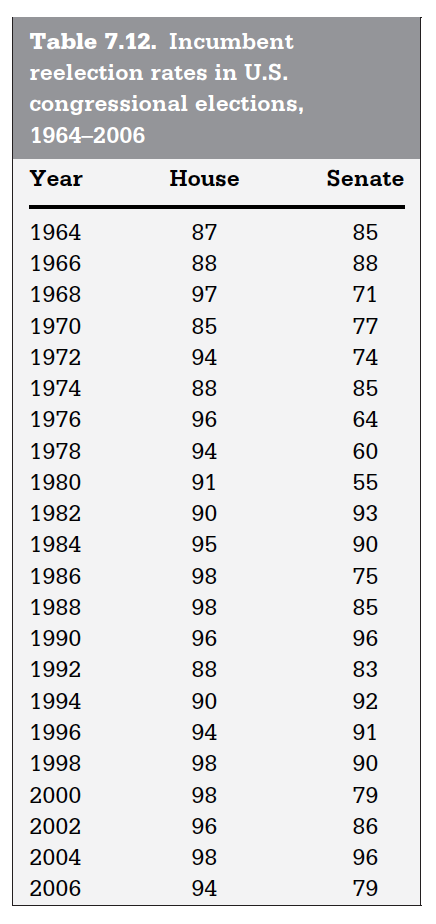
</div>

Use the data in the table above to generate variables of the data below. 

Then, calculate the means and standard deviations of the two groups (pre-scandal and post-scandal) along with the sample sizes of the two groups.

In [30]:
house = [...]
scandal = [...]

df = pd.DataFrame(
    {'house': house,
     'scandal': scandal
    }) #this code just creates a dataframe of the variables, you don't need to change anything



#for mean2 and s2, make sure the value matches for what you put in the scandal variable
mean1 = np.mean(df[df.scandal==1]['house']) 
s1 = np.std(df[df.scandal==1]['house'])
n1 = ...

mean2 = ...
s2 =  ...
n2 =  ...

diff = ...

mean1, s1, n1, mean2, s2, n2, diff

4.0

Now let's calculate the standard error and t-statistic in order to conduct the hypothesis test. We will use the first formula given below for the standard error (the lecture one) in our calculations.

Formula for standard error of difference of means given in lecture and textbook:

$$SE(\bar{Y}_1 - \bar{Y}_2) = \sqrt{(\frac{(n_1 - 1)s^2_1 + (n_2 - 1)s^2_2}{n_1 + n_2 - 2})} \times \sqrt{(\frac{1}{n_1} + \frac{1}{n_2})}$$

Formula on homework and used in canned Python and R functions:
$$SE(\bar{Y}_1 - \bar{Y}_2) = \sqrt{\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}}$$

To calculate the t-statistic:
$$ t_{\overline{Y_1}-\overline{Y_2}} =\frac{\overline{Y_1}-\overline{Y_2}}{SE(\bar{Y}_1 - \bar{Y}_2)}$$

In [2]:
#hint1: the standard error uses variance
#hint2: to take the square root, use this function: np.sqrt()

SE = ...

t_stat = ...

Look up the table of critical values of t to see if our t-statistic is statistically significant. Recall the degrees of freedom are calculated $df = n_1 + n_2 − 2$. Is our test statistically significant?

*Your answer*

Now let's use a canned function to run the t-test.

In [7]:
#put in the values of scandal that indicate pre-scandal and post-scandal
#the code below is saying take the values of our house variable pre-scandal and compare the values of house post-scandal
stats.ttest_ind(df[df.scandal==...]['house'],df[df.scandal==...]['house'])

Ttest_indResult(statistic=-3.6742346141747673, pvalue=0.021311641128756727)

Your t-statistic won't be the same, because the canned function uses the second formula for standard error. It also reports the p-value. Is it statistically significant?

*Your answer*